In [ ]:
!unzip /content/drive/MyDrive/Dataset/kagglecatsanddogs_3367a.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  inflating: P

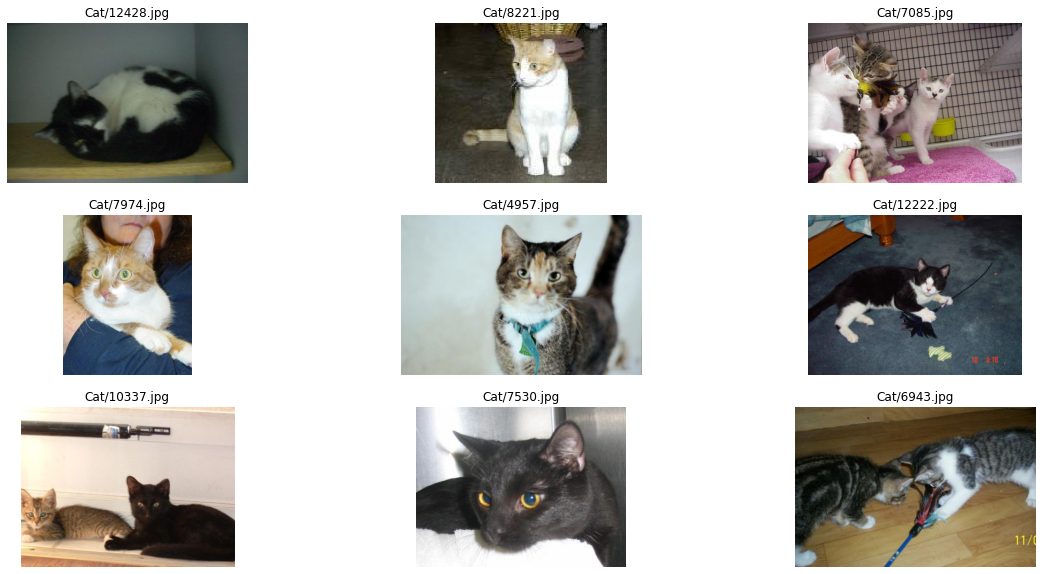

In [ ]:
# 고양이 이미지 랜덤으로 추출 
from matplotlib import pyplot as plt
import os
import random
_, _, cat_images=next(os.walk('PetImages/Cat'))

fig, ax=plt.subplots(3,3,figsize=(20,10))

for idx, img in enumerate(random.sample(cat_images,9)):
  img_read=plt.imread('PetImages/Cat/'+img)
  ax[int(idx/3), idx%3].imshow(img_read)
  ax[int(idx/3), idx%3].axis('off')
  ax[int(idx/3), idx%3].set_title('Cat/'+img)

plt.show()

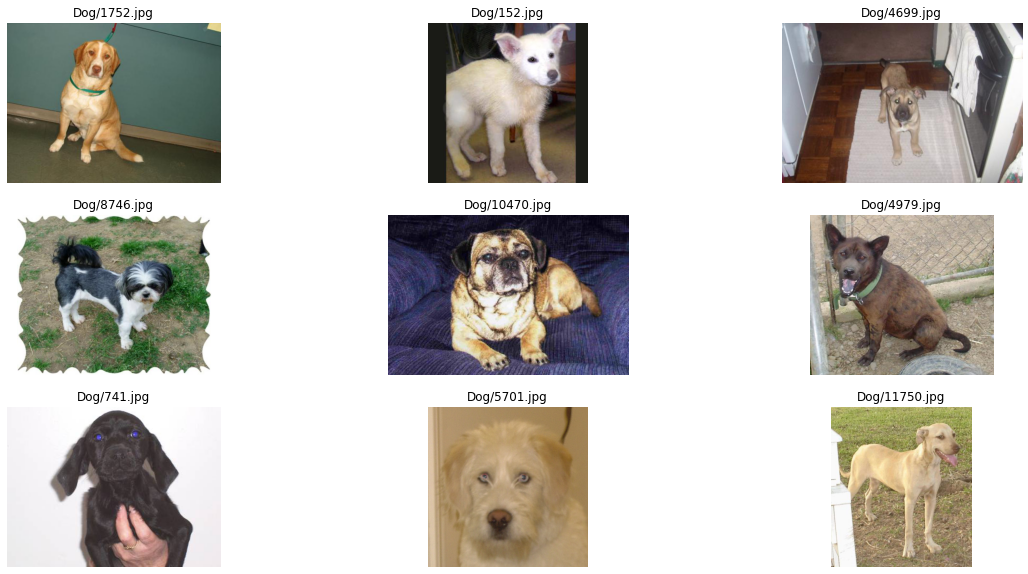

In [ ]:
# 개 이미지 랜덤으로 추출 
_, _, dog_images=next(os.walk('PetImages/Dog'))

fig, ax=plt.subplots(3,3,figsize=(20,10))

for idx, img in enumerate(random.sample(dog_images,9)):
  img_read=plt.imread('PetImages/Dog/'+img)
  ax[int(idx/3), idx%3].imshow(img_read)
  ax[int(idx/3), idx%3].axis('off')
  ax[int(idx/3), idx%3].set_title('Dog/'+img)

plt.show()

In [ ]:
# ImageDataGenerator 클래스를 사용하여 이미지 증강 기법 적용
'''
rotation_range : 지정된 각도 범위 내에서 임의로 원본 이미지 회전 
zoom_range : 지정된, 범위 내에서 확대 축소 
width_shift_range, height_shift_range : 지정된 수평방향/수직방향 이동 범위 내에서 임의로 원본 이미지 이동
horizontal_flip : 가로로 뒤집기
''' 
from keras.preprocessing.image import ImageDataGenerator

image_generator=ImageDataGenerator(rotation_range=30,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [ ]:
# 데이터셋 분류!
import os
import random
import shutil

def train_test_split(src_folder, train_size = 0.8):
	# 기존 폴더를 삭제하고 깨끗한 상태로 시작한다. 
	shutil.rmtree(src_folder+'Train/Cat/', ignore_errors=True)
	shutil.rmtree(src_folder+'Train/Dog/', ignore_errors=True)
	shutil.rmtree(src_folder+'Test/Cat/', ignore_errors=True)
	shutil.rmtree(src_folder+'Test/Dog/', ignore_errors=True)

	# train 폴더와 test 폴더를 새로 생성한다.
	os.makedirs(src_folder+'Train/Cat/')
	os.makedirs(src_folder+'Train/Dog/')
	os.makedirs(src_folder+'Test/Cat/')
	os.makedirs(src_folder+'Test/Dog/')

	# 고양이 이미지와 개 이미지 개수를 가져온다.
	_, _, cat_images = next(os.walk(src_folder+'Cat/'))
	files_to_be_removed = ['Thumbs.db', '666.jpg', '835.jpg']
	for file in files_to_be_removed:
		cat_images.remove(file)
	num_cat_images = len(cat_images)
	num_cat_images_train = int(train_size * num_cat_images)
	num_cat_images_test = num_cat_images - num_cat_images_train

	_, _, dog_images = next(os.walk(src_folder+'Dog/'))
	files_to_be_removed = ['Thumbs.db', '11702.jpg']
	for file in files_to_be_removed:
		dog_images.remove(file)
	num_dog_images = len(dog_images)
	num_dog_images_train = int(train_size * num_dog_images)
	num_dog_images_test = num_dog_images - num_dog_images_train

	# 이미지를 무작위로 골라 train 폴더와 test 폴더로 나눈다.
	cat_train_images = random.sample(cat_images, num_cat_images_train)
	for img in cat_train_images:
		shutil.copy(src=src_folder+'Cat/'+img, dst=src_folder+'Train/Cat/')
	cat_test_images  = [img for img in cat_images if img not in cat_train_images]
	for img in cat_test_images:
		shutil.copy(src=src_folder+'Cat/'+img, dst=src_folder+'Test/Cat/')

	dog_train_images = random.sample(dog_images, num_dog_images_train)
	for img in dog_train_images:
		shutil.copy(src=src_folder+'Dog/'+img, dst=src_folder+'Train/Dog/')
	dog_test_images  = [img for img in dog_images if img not in dog_train_images]
	for img in dog_test_images:
		shutil.copy(src=src_folder+'Dog/'+img, dst=src_folder+'Test/Dog/')

src_folder='PetImages/'
train_test_split(src_folder)

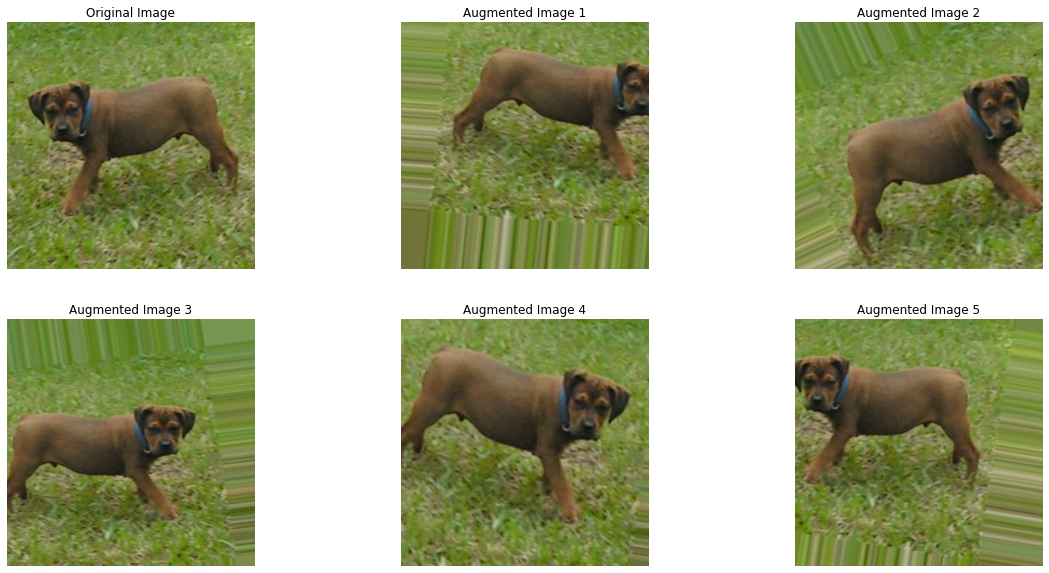

In [ ]:
# 이미지 증강
fig, ax=plt.subplots(2, 3, figsize=(20, 10))
all_images=[]

_, _, dog_images=next(os.walk('PetImages/Train/Dog/'))
random_img=random.sample(dog_images, 1)[0]
random_img=plt.imread('PetImages/Train/Dog/'+random_img)
all_images.append(random_img)

random_img=random_img.reshape((1,)+random_img.shape)
sample_augmented_images=image_generator.flow(random_img)

for _ in range(5):
  augmented_imgs=sample_augmented_images.next()
  for img in augmented_imgs:
    all_images.append(img.astype('uint8'))

for idx, img in enumerate(all_images):
  ax[int(idx/3), idx%3].imshow(img)
  ax[int(idx/3), idx%3].axis('off')
  if idx==0:
    ax[int(idx/3), idx%3].set_title('Original Image')
  else:
    ax[int(idx/3), idx%3].set_title('Augmented Image {}'.format(idx))

plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

model=Sequential()

FILTER_SIZE=3 # 컨볼루션 레이어 필터 크기, 3*3
NUM_FILTERS=32 # 필터 개수 
INPUT_SIZE=32 # 입력 이미지 크기 
MAXPOOL_SIZE=2 # 최대 풀링 크기, 2*2
BATCH_SIZE=16 # 한번에 처리하는 훈련 데이터셋 개수 
STEPS_PER_EPOCH=20000/BATCH_SIZE # 각 훈련당 반복 횟수 
EPOCHS=10 # 훈련 횟수 


In [ ]:
model.add(Conv2D(NUM_FILTERS, (FILTER_SIZE, FILTER_SIZE),
                 input_shape=(INPUT_SIZE, INPUT_SIZE, 3),
                 activation='relu')) # 컨볼루션 레이어 

model.add(MaxPooling2D(pool_size=(MAXPOOL_SIZE, MAXPOOL_SIZE))) # 최대 풀링 레이어
model.add(Conv2D(NUM_FILTERS, (FILTER_SIZE, FILTER_SIZE), activation='relu')) # 컨볼루션 레이어 
model.add(MaxPooling2D(pool_size=(MAXPOOL_SIZE, MAXPOOL_SIZE))) # 최대 풀링 레이어 

model.add(Flatten()) # 1차원 벡터로 변환 
model.add(Dense(units=128, activation='relu')) # 완전 연결 레이어 
model.add(Dropout(0.5)) # 가중치 중 50%를 0으로 만듦 -> 특정 가중치에 너무 치중하는 것을 방지
model.add(Dense(units=1, activation='sigmoid')) # 완전 연결 레이어 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
training_data_generator=ImageDataGenerator(rescale=1./255)

training_set=training_data_generator.flow_from_directory('PetImages/Train/',
                                                         target_size=(INPUT_SIZE, INPUT_SIZE),
                                                                      batch_size=BATCH_SIZE,
                                                                      class_mode='binary')
model.fit_generator(training_set, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS, verbose=1)

Found 19997 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
 805/1250 [==================>...........] - ETA: 28s - loss: 0.6508 - accuracy: 0.6135

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

1250/1250 [==============================] - 82s 65ms/step - loss: 0.6305 - accuracy: 0.6367
Epoch 2/10
1250/1250 [==============================] - 82s 66ms/step - loss: 0.5393 - accuracy: 0.7323
Epoch 3/10
1250/1250 [==============================] - 81s 65ms/step - loss: 0.4940 - accuracy: 0.7605
Epoch 4/10
1250/1250 [==============================] - 80s 64ms/step - loss: 0.4636 - accuracy: 0.7796
Epoch 5/10
1250/1250 [==============================] - 80s 64ms/step - loss: 0.4426 - accuracy: 0.7949
Epoch 6/10
1250/1250 [==============================] - 82s 66ms/step - loss: 0.4206 - accuracy: 0.8033
Epoch 7/10
1250/1250 [==============================] - 82s 66ms/step - loss: 0.3985 - accuracy: 0.8193
Epoch 8/10
1250/1250 [==============================] - 80s 64ms/step - loss: 0.3821 - accuracy: 0.8276
Epoch 9/10
1250/1250 [==============================] - 82s 65ms/step - loss: 0.3594 - accuracy: 0.8394
Epoch 10/10
1250/1250 [==============================] - 80s 64ms/step - lo

In [ ]:
testing_data_generator=ImageDataGenerator(rescale=1./255)

test_set=testing_data_generator.flow_from_directory('PetImages/Test/',
                                                         target_size=(INPUT_SIZE, INPUT_SIZE),
                                                                      batch_size=BATCH_SIZE,
                                                                      class_mode='binary')
score=model.evaluate_generator(test_set, steps=len(test_set))
for idx, metric in enumerate(model.metrics_names):
  print("{}:{}".format(metric, score[idx]))

Found 5000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  import sys


loss:0.4867056608200073
accuracy:0.7864000201225281


In [ ]:
# 전이 학습 
from keras.applications.vgg16 import VGG16

INPUT_SIZE=128
vgg16=VGG16(include_top=False, weights='imagenet', input_shape=(INPUT_SIZE, INPUT_SIZE, 3))

for layer in vgg16.layers:
  layer.trainable=False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Model

input_=vgg16.input
output_=vgg16(input_)
last_layer=Flatten(name='flatten')(output_)
last_layer=Dense(1, activation='sigmoid')(last_layer)
model=Model(inputs=input_, outputs=last_layer)

In [ ]:
BATCH_SIZE=16
STEPS_PER_EPOCH=200
EPOCHS=3

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
training_data_generator=ImageDataGenerator(rescale=1./255)
test_data_generator=ImageDataGenerator(rescale=1./255)

training_set=training_data_generator.flow_from_directory('PetImages/Train/',
                                                         target_size=(INPUT_SIZE, INPUT_SIZE),
                                                                      batch_size=BATCH_SIZE,
                                                                      class_mode='binary')
testing_set=testing_data_generator.flow_from_directory('PetImages/Test/',
                                                         target_size=(INPUT_SIZE, INPUT_SIZE),
                                                                      batch_size=BATCH_SIZE,
                                                                      class_mode='binary')
model.fit_generator(training_set, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS, verbose=1)

Found 19997 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


200/200 [==============================] - 539s 3s/step - loss: 0.3719 - accuracy: 0.8297
Epoch 2/3
200/200 [==============================] - 537s 3s/step - loss: 0.2800 - accuracy: 0.8784
Epoch 3/3
200/200 [==============================] - 537s 3s/step - loss: 0.2533 - accuracy: 0.8918


In [ ]:
score=model.evaluate_generator(testing_set, len(testing_set))

for idx, metric in enumerate(model.metrics_names):
  print("{}:{}".format(metric, score[idx]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


loss:0.29397091269493103
accuracy:0.870199978351593


In [ ]:
# 시각화할 테스트 데이터 생성 
testing_set=testing_data_generator.flow_from_directory('PetImages/Test/',
                                                         target_size=(INPUT_SIZE, INPUT_SIZE),
                                                                      batch_size=1,
                                                                      class_mode='binary')

strongly_wrong_idx=[]
strongly_right_idx=[]
weakly_wrong_idx=[]

for i in range(testing_set.__len__()):
  img=testing_set.__getitem__(i)[0]
  pred_prob=model.predict(img)[0][0]
  pred_label=int(pred_prob>0.5)
  actual_label=int(testing_set.__getitem__(i)[1][0])
  if pred_label!=actual_label and (pred_prob>0.8 or pred_prob<0.2):
    strongly_wrong_idx.append(i)
  elif pred_label!=actual_label and (pred_prob>0.4 and pred_prob<0.6):
    weakly_wrong_idx.append(i)
  elif pred_label==actual_label and (pred_prob>0.8 or pred_prob<0.2):
    strongly_right_idx.append(i)
  
  if(len(strongly_wrong_idx)>=9 and len(strongly_right_idx)>=9 and len(weakly_wrong_idx)>=9):break;

Found 5000 images belonging to 2 classes.


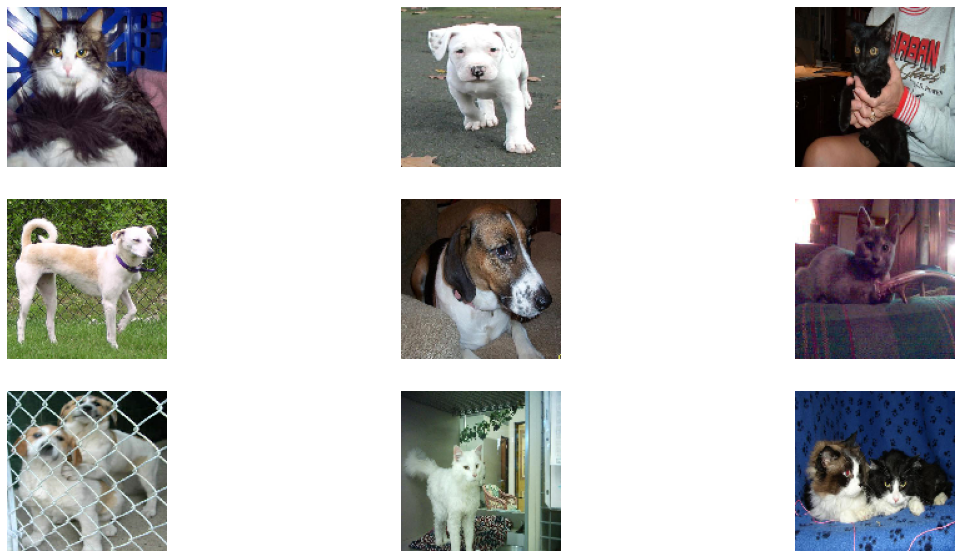

In [ ]:
from matplotlib import pyplot as plt
import random

def plot_on_grid(test_set, idx_to_plot, img_size=INPUT_SIZE):
  fig, ax=plt.subplots(3, 3, figsize=(20, 10))
  for i, idx in enumerate(random.sample(idx_to_plot,9)):
    img=test_set.__getitem__(idx)[0].reshape(img_size, img_size, 3)
    ax[int(i/3), i%3].imshow(img)
    ax[int(i/3), i%3].axis('off')

# 정확하게 맞은 결과 이미지들 
plot_on_grid(testing_set, strongly_right_idx)
plt.show()

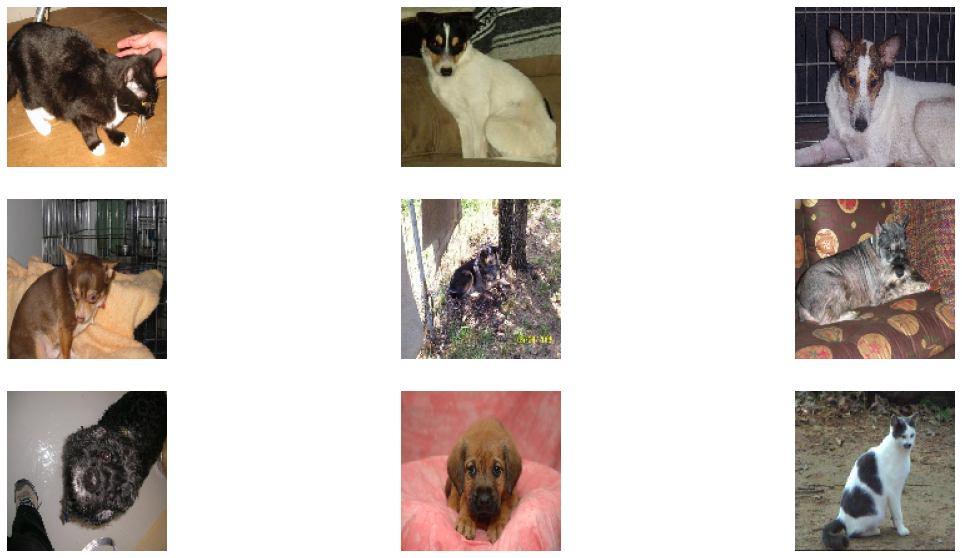

In [ ]:
# 완전히 틀린 이미지들  
plot_on_grid(testing_set, strongly_wrong_idx)
plt.show()

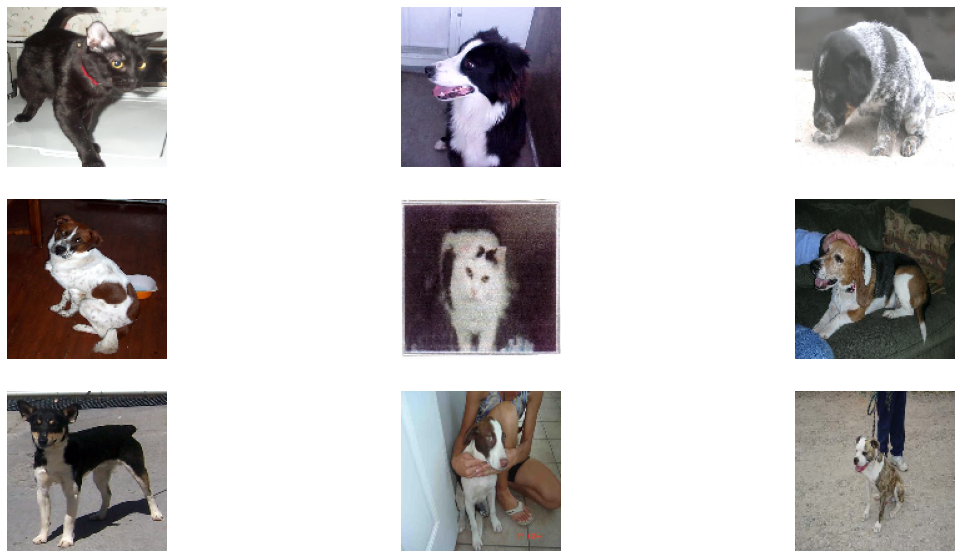

In [ ]:
# 근소하게 틀린 이미지들 
plot_on_grid(testing_set, weakly_wrong_idx)
plt.show()